In [1]:
import sys
sys.path.insert(0, "../")

In [2]:
import matplotlib.pyplot as plt

from experiments.data_visualisation import fetch_and_aggregate_experiment_data

# BERT training

In [3]:
line_styles = [("--", "o"), ("-", "o"), ("-.", "o"), (":", "o"),
               ("--", "s"), ("-", "s"), ("-.", "s"), (":", "s")]


def plot_data(data_to_plot, num_epochs, data_key, trial_label_generator=None):
    data_to_plot = [
        (trial_name if trial_label_generator is None else 
             trial_label_generator(data["trial_name"], data["hyperparameters"]), 
         data) for data in data_to_plot]
    data_to_plot.sort()

    for (label, data), (line, marker) in zip(data_to_plot, line_styles):        
        y = data[data_key][:num_epochs]
        plt.plot(
            range(1, len(y)+1), y,
            label=label,
            marker=marker,
            linestyle=line,
        )
        plt.xlabel("Epoch")
        plt.legend()

        
def preprocess_label(t, hp):
    return {
        "[remove_emojis]": "-emojis",
        "[remove_emojis, remove_punctuation]": "-emojis, -punctuation",
        "[remove_emojis, remove_tags]": "-emojis, -tags",
        "[remove_emojis, remove_tags, remove_punctuation]": "-emojis, -tags, -punctuation",
        "[tag_emojis]": "[emojis]",
        "[tag_emojis, remove_punctuation]": "[emojis], -punctuation",
        "[replace_emojis_no_sep]": "+emojis",
        "[replace_emojis_no_sep, remove_tags]": "+emojis, -tags",
        "[replace_emojis_no_sep, remove_tags, remove_punctuation]": "+emojis, -tags, -punctuation",
        "none": "No preprocessing",
    }[hp.get('Bert.preprocessing')]


def encoder_outputs_label(t, hp):
    return {
        "default": "Last layer",
        "2nd_to_last_hidden_layer": "2nd-to-last layer",
        "sum_all_hidden_layers": "Sum all layers",
        "sum_last_4_hidden_layers": "Sum last 4 layers",
        "concat_last_4_hidden_layers": "Concatenate last 4 layers",
    }[hp.get('selected_encoder_outputs')]


def pooler_label(t, hp):
    return {
        "max": "Max",
        "concat": "Concatenate",
        "average": "Average"
    }[hp.get('Bert.pooler')]

## BERT individual HP tuning

### Preprocessing choice

In [179]:
# Traing on batch_size=32, dropout_rate=0.1, learning_rate=2e-5
data, num_epochs = fetch_and_aggregate_experiment_data(
    "../../training/bert_clf/tweet_level/preprocessing",
    trial_aggregator=lambda hp: hp.get('Bert.preprocessing'),
)

Text(0.5, 1.0, 'Training Loss')

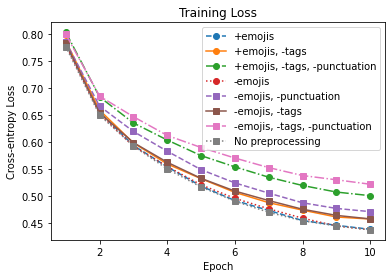

In [180]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_loss", trial_label_generator=preprocess_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

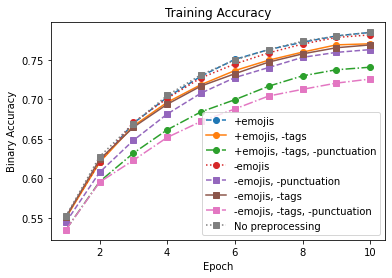

In [181]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_binary_accuracy", trial_label_generator=preprocess_label)
plt.ylabel("Binary Accuracy")
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Validation Loss')

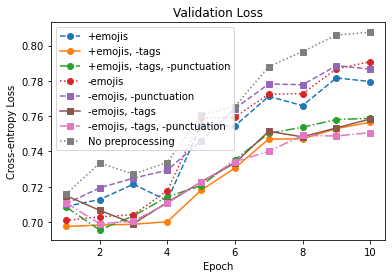

In [182]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_loss", trial_label_generator=preprocess_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Validation Loss")

Text(0.5, 1.0, 'Validation Accuracy')

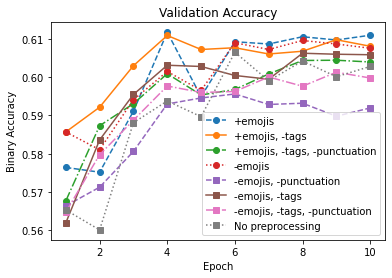

In [183]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_binary_accuracy", trial_label_generator=preprocess_label)
plt.ylabel("Binary Accuracy")
plt.title("Validation Accuracy")

### BERT pooled_output strategy

In [4]:
# Traing on batch_size=32, dropout_rate=0.1, learning_rate=2e-5, preprocessing=[replace_emojis_no_sep, remove_tags]
data, num_epochs = fetch_and_aggregate_experiment_data(
    "../../training/bert_clf/tweet_level/pooled_output",
    trial_aggregator=lambda hp: hp.get('selected_encoder_outputs'),
)

Text(0.5, 1.0, 'Training Loss')

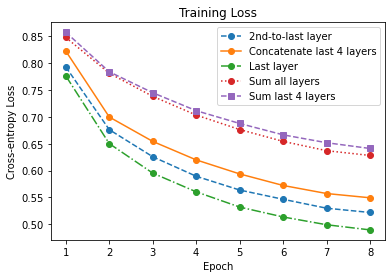

In [5]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_loss", trial_label_generator=encoder_outputs_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

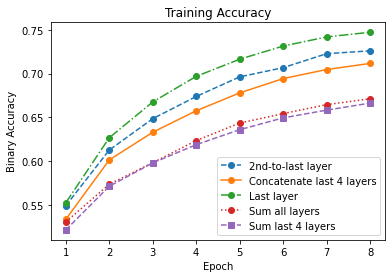

In [6]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_binary_accuracy", trial_label_generator=encoder_outputs_label)
plt.ylabel("Binary Accuracy")
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Validation Loss')

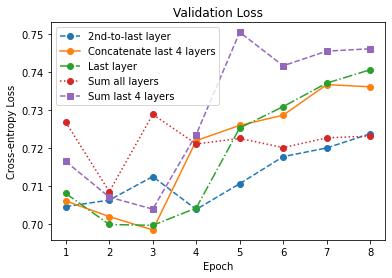

In [7]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_loss", trial_label_generator=encoder_outputs_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Validation Loss")

Text(0.5, 1.0, 'Validation Accuracy')

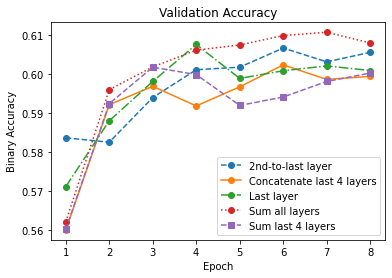

In [8]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_binary_accuracy", trial_label_generator=encoder_outputs_label)
plt.ylabel("Binary Accuracy")
plt.title("Validation Accuracy")

## BERT chunked HP tuning

### Preprocessing choice

In [130]:
data, num_epochs = fetch_and_aggregate_experiment_data(
    "../../training/bert_clf/downstream_loss/indiv_2",
    trial_aggregator=lambda hp: hp.get('Bert.preprocessing'),
    trial_filterer=lambda t, hp: 
        hp.get("Bert.pooler") == "max" and hp.get("selected_encoder_outputs") == "default",
)

Text(0.5, 1.0, 'Training Loss')

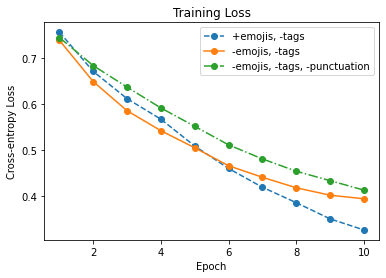

In [131]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_loss", trial_label_generator=preprocess_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

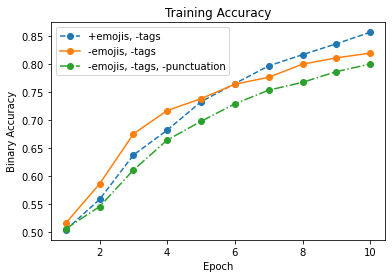

In [132]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_binary_accuracy", trial_label_generator=preprocess_label)
plt.ylabel("Binary Accuracy")
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Validation Loss')

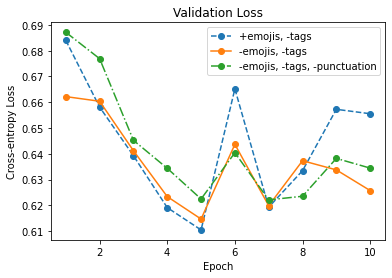

In [133]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_loss", trial_label_generator=preprocess_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Validation Loss")

Text(0.5, 1.0, 'Validation Accuracy')

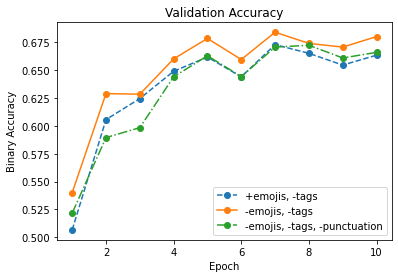

In [134]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_binary_accuracy", trial_label_generator=preprocess_label)
plt.ylabel("Binary Accuracy")
plt.title("Validation Accuracy")

### BERT pooled_output strategy

In [135]:
data, num_epochs = fetch_and_aggregate_experiment_data(
    "../../training/bert_clf/downstream_loss/indiv_2",
    trial_aggregator=lambda hp: hp.get('selected_encoder_outputs'),
    trial_filterer=lambda t, hp: 
        hp.get("Bert.pooler") == "max" and hp.get("Bert.preprocessing") == "[remove_emojis, remove_tags]",
)

Text(0.5, 1.0, 'Training Loss')

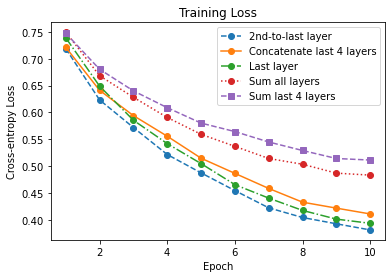

In [136]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_loss", trial_label_generator=encoder_outputs_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

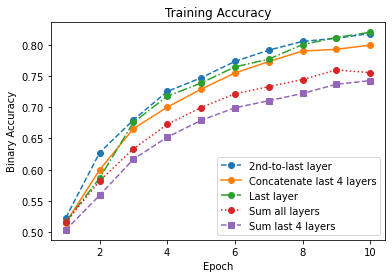

In [137]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_binary_accuracy", trial_label_generator=encoder_outputs_label)
plt.ylabel("Binary Accuracy")
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Validation Loss')

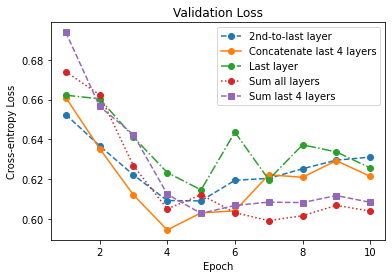

In [138]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_loss", trial_label_generator=encoder_outputs_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Validation Loss")

Text(0.5, 1.0, 'Validation Accuracy')

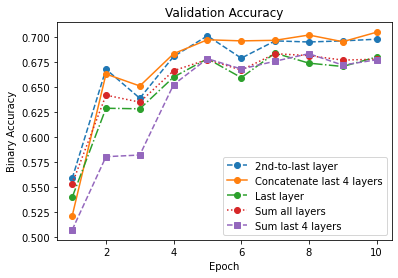

In [139]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_binary_accuracy", trial_label_generator=encoder_outputs_label)
plt.ylabel("Binary Accuracy")
plt.title("Validation Accuracy")

### BERT tweet embeddings pooler

In [140]:
data, num_epochs = fetch_and_aggregate_experiment_data(
    "../../training/bert_clf/downstream_loss/indiv_2",
    trial_aggregator=lambda hp: hp.get('Bert.pooler'),
    trial_filterer=lambda t, hp: 
        hp.get("selected_encoder_outputs") == "sum_all_hidden_layers" and 
        hp.get("Bert.preprocessing") == "[remove_emojis, remove_tags]",
)

Text(0.5, 1.0, 'Training Loss')

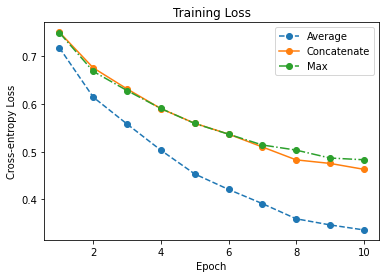

In [141]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_loss", trial_label_generator=pooler_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

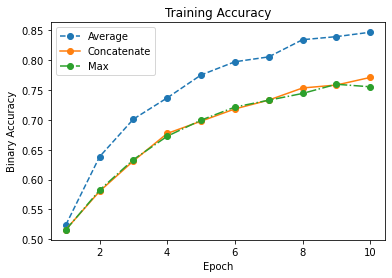

In [142]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_binary_accuracy", trial_label_generator=pooler_label)
plt.ylabel("Binary Accuracy")
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Validation Loss')

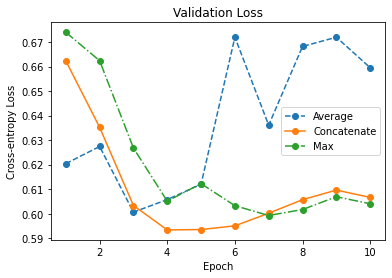

In [143]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_loss", trial_label_generator=pooler_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Validation Loss")

Text(0.5, 1.0, 'Validation Accuracy')

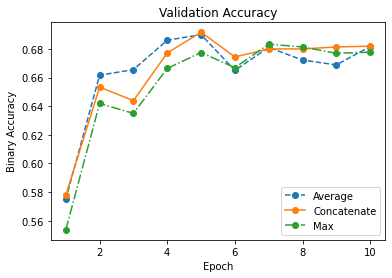

In [144]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_binary_accuracy", trial_label_generator=pooler_label)
plt.ylabel("Binary Accuracy")
plt.title("Validation Accuracy")

### Best BERT chunked models

In [164]:
def best_chunked_label(t, hp):
    return f"{encoder_outputs_label(t, hp)}, {preprocess_label(t, hp)}, {pooler_label(t, hp)}"


def select_best_models(t, hp):
    pooled_output = hp.get("selected_encoder_outputs")
    preprocessing = hp.get("Bert.preprocessing")
    pooler = hp.get("Bert.pooler")
    
    best_models = {
        "sum_all_hidden_layers [remove_emojis, remove_tags] concat",
        "sum_all_hidden_layers [remove_emojis, remove_tags] max",
        "sum_last_4_hidden_layers [remove_emojis, remove_tags] concat",
    }
    return f"{pooled_output} {preprocessing} {pooler}" in best_models


data, num_epochs = fetch_and_aggregate_experiment_data(
    "../../training/bert_clf/downstream_loss/indiv_2",
    trial_aggregator=lambda hp: best_chunked_label(None, hp),
    trial_filterer=select_best_models,
)

Text(0.5, 1.0, 'Training Loss')

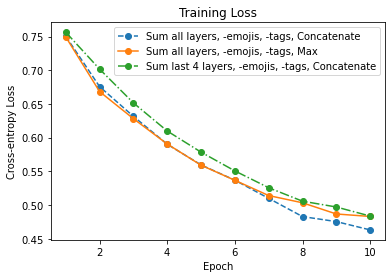

In [172]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_loss", trial_label_generator=best_chunked_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

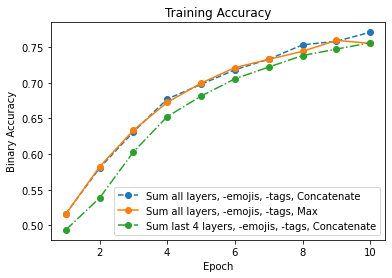

In [171]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_binary_accuracy", trial_label_generator=best_chunked_label)
plt.ylabel("Binary Accuracy")
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Validation Loss')

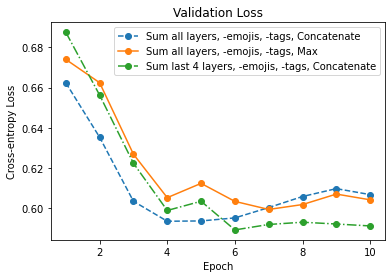

In [170]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_loss", trial_label_generator=best_chunked_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Validation Loss")

Text(0.5, 1.0, 'Validation Accuracy')

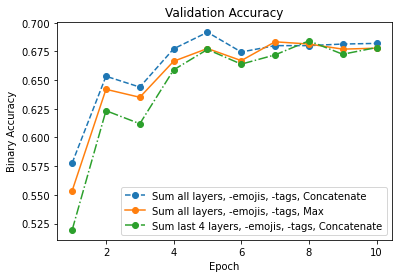

In [169]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_binary_accuracy", trial_label_generator=best_chunked_label)
plt.ylabel("Binary Accuracy")
plt.title("Validation Accuracy")

### BERT chunked kernel regularisation

In [12]:
def kernel_reg_label(t, hp):
    return f"{hp.get('Bert.dense_kernel_reg')} l2"

# batch_size=8, dropout_rate=0.1, pooling strategy=sum_last_4_hidden_layers, pooler=concat, 
# preprocessing=[remove_emojis, remove_tags], learning_rate=2e-5
data, num_epochs = fetch_and_aggregate_experiment_data(
    "../../training/bert_clf/downstream_loss/kernel_reg",
    trial_aggregator=lambda hp: hp.get("Bert.dense_kernel_reg"),
)

Text(0.5, 1.0, 'Training Loss')

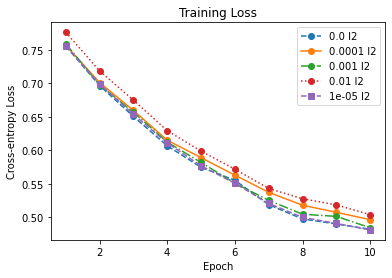

In [13]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_loss", trial_label_generator=kernel_reg_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

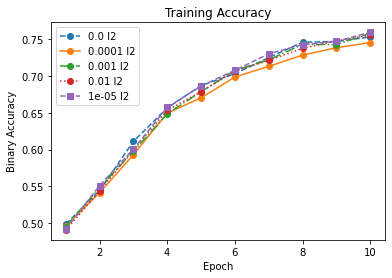

In [14]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_binary_accuracy", trial_label_generator=kernel_reg_label)
plt.ylabel("Binary Accuracy")
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Validation Loss')

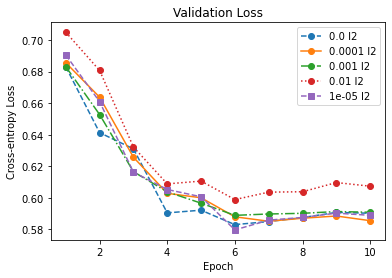

In [15]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_loss", trial_label_generator=kernel_reg_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Validation Loss")

Text(0.5, 1.0, 'Validation Accuracy')

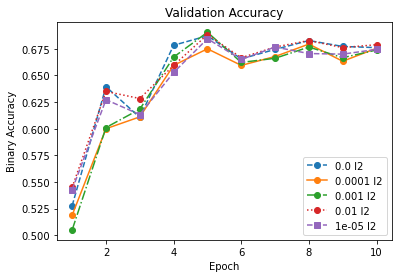

In [16]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_binary_accuracy", trial_label_generator=kernel_reg_label)
plt.ylabel("Binary Accuracy")
plt.title("Validation Accuracy")

### BERT chunked number of linear layers